In [10]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 


wine = pd.read_csv("Datasets/winequality-red4_7.csv")

X = wine[['alcohol', 'pH']].to_numpy()

y = wine['quality'].to_numpy()




In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- x_0 <= 9.65
|   |--- x_0 <= 9.55
|   |   |--- x_0 <= 9.45
|   |   |   |--- x_1 <= 3.12
|   |   |   |   |--- x_1 <= 2.90
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- x_1 >  2.90
|   |   |   |   |   |--- class: 7
|   |   |   |--- x_1 >  3.12
|   |   |   |   |--- class: 4
|   |   |--- x_0 >  9.45
|   |   |   |--- class: 7
|   |--- x_0 >  9.55
|   |   |--- class: 4
|--- x_0 >  9.65
|   |--- x_0 <= 11.25
|   |   |--- x_1 <= 3.48
|   |   |   |--- x_1 <= 3.27
|   |   |   |   |--- x_1 <= 3.09
|   |   |   |   |   |--- x_1 <= 3.06
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- x_1 >  3.06
|   |   |   |   |   |   |--- x_0 <= 10.20
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- x_0 >  10.20
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- x_1 >  3.09
|   |   |   |   |   |--- class: 7
|   |   |   |--- x_1 >  3.27
|   |   |   |   |--- x_0 <= 9.95
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- x_0 >  9.95
|   |   |   |   |  

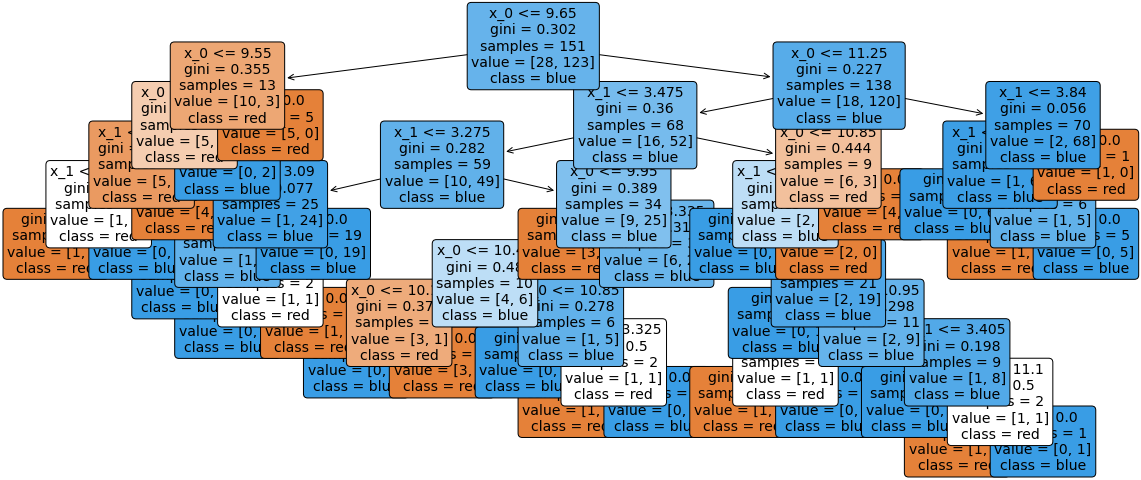

In [14]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)

plt.show()


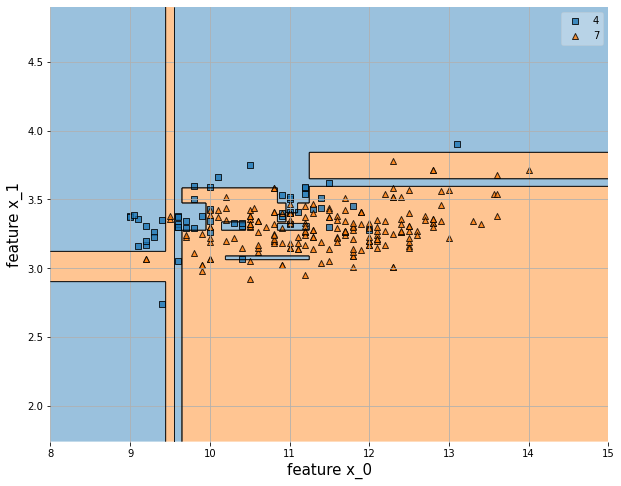

In [15]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

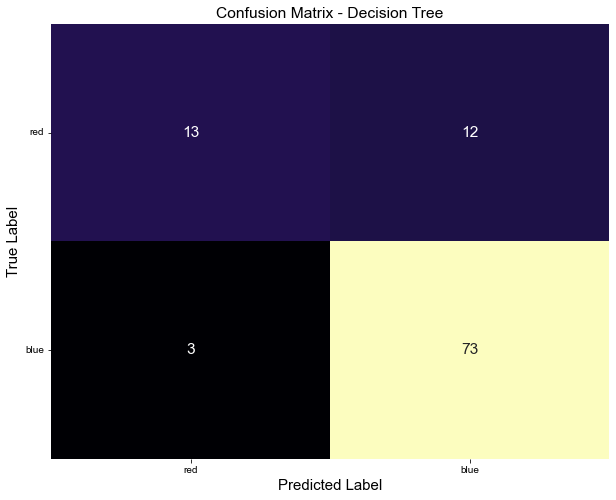

In [16]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [17]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.81      0.52      0.63        25
           7       0.86      0.96      0.91        76

    accuracy                           0.85       101
   macro avg       0.84      0.74      0.77       101
weighted avg       0.85      0.85      0.84       101



The accuracy of ~84% shows the model has worked well. From the confusion matrix we can see that the model is much more successful in accurately predicting Quality 4.

In [18]:
#Regression Trees

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [19]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 1.3268890200708379 

MSE reg2: 1.7142857142857142 



In [21]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=1)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")



MSE reg1: 1.3268890200708379 

MSE reg2: 1.3268890200708379 

